In [100]:
import spacy
import nltk
nlp= spacy.load('en_core_web_sm')
import re
import wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score,precision_score,recall_score,confusion_matrix,roc_auc_score,roc_curve
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [77]:
df=pd.read_csv('/content/amazonreviews.tsv',sep='\t')

In [78]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [79]:
df

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [80]:
df.shape

(10000, 2)

In [81]:
df.isnull().sum()

,0
label,0
review,0


In [82]:
df.duplicated().sum()

np.int64(0)

In [83]:
df['review']=df['review'].str.lower()

In [84]:
lemmatizer = WordNetLemmatizer()

In [85]:
df.head()

,label,review
0,pos,stuning even for the non-gamer: this sound tra...
1,pos,the best soundtrack ever to anything.: i'm rea...
2,pos,amazing!: this soundtrack is my favorite music...
3,pos,excellent soundtrack: i truly like this soundt...
4,pos,"remember, pull your jaw off the floor after he..."


In [86]:
def preprocess_text(text):
    text = re.sub(r'[^a-z\s]', '', text)

    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [87]:
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
df['cleaned_review'] = df['review'].apply(preprocess_text)

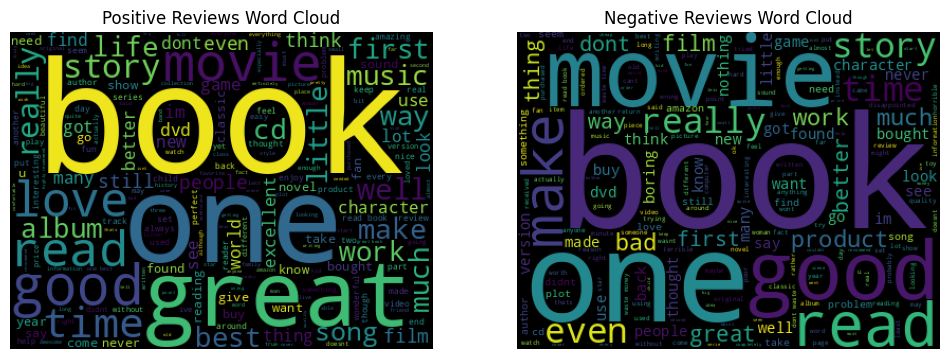

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews by sentiment
pos_text = " ".join(df[df['label'] == 'pos']['cleaned_review'])
neg_text = " ".join(df[df['label'] == 'neg']['cleaned_review'])

plt.figure(figsize=(12, 6))

# Positive reviews
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=300).generate(pos_text))
plt.title("Positive Reviews Word Cloud")
plt.axis('off')

# Negative reviews
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=300).generate(neg_text))
plt.title("Negative Reviews Word Cloud")
plt.axis('off')
plt.show()

In [90]:
df['target'] = df['label'].map({'pos': 1, 'neg': 0})

x = df['cleaned_review']
y = df['target']

Text(0.5, 0, 'Sentiment')

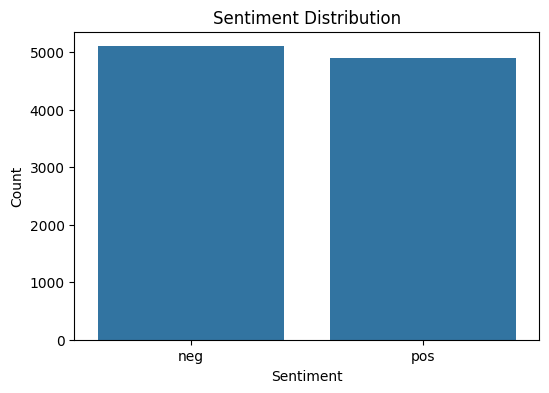

In [91]:
sentiment_counts = y.value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=['neg','pos'], y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.xlabel('Sentiment')

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Train set size: 8000
Test set size: 2000


In [93]:
count_vect = CountVectorizer(stop_words='english')
count_vect.fit(x_train)

CountVectorizer(stop_words='english')

In [94]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [95]:
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

In [96]:
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [97]:
clf = MultinomialNB()
clf.fit(x_train_tfidf, y_train)


MultinomialNB()

In [102]:
y_pred = clf.predict(x_test_tfidf)
y_proba = clf.predict_proba(x_test_tfidf)[:, clf.classes_.tolist().index(1)]


In [103]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)

In [104]:
print("Accuracy: {:.4f}".format(acc))
print("Precision: {:.4f}".format(prec))
print("Recall: {:.4f}".format(rec))
print("F1-score: {:.4f}".format(f1))
print("ROC AUC: {:.4f}".format(roc_auc))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['neg','pos']))


Accuracy: 0.8280
Precision: 0.8421
Recall: 0.7992
F1-score: 0.8201
ROC AUC: 0.9084

Classification Report:

              precision    recall  f1-score   support

         neg       0.82      0.86      0.84      1019
         pos       0.84      0.80      0.82       981

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



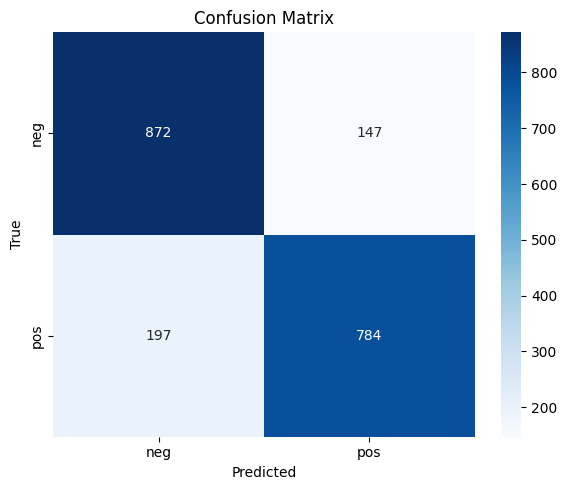

In [105]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['neg','pos'], yticklabels=['neg','pos'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [106]:
print(classification_report(y_test, y_pred, target_names=['Negative (0)', 'Positive (1)']))

              precision    recall  f1-score   support

Negative (0)       0.82      0.86      0.84      1019
Positive (1)       0.84      0.80      0.82       981

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



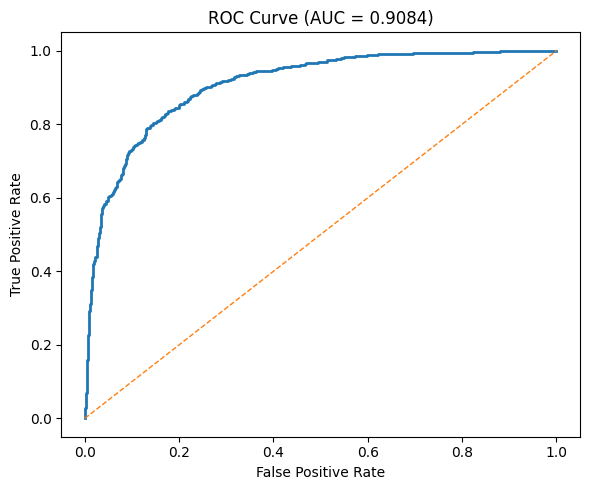

In [107]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.4f})')
plt.tight_layout()
plt.show()